## Exercice 2:

In [1]:
#https://osf.io/jda6s/
import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

D'abord nous téléchargeons le jeu donnée MNIST depuis 'https://osf.io/jda6s/', puis nous le passons manuellement dans le path prévu pour ensuite les charger à l'aide de 'fetch_mldata'

In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('mnist-original')
X = mnist.data.astype('float64')
y = mnist.target.astype('float64')

mnist.data.shape

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)

Notre X contient '70000' images de chiffres codées en des array de taille '784',
et le y les chiffres correspandants

In [3]:
X.data.shape


(70000, 784)

In [4]:
y.data.shape

(70000,)

In [5]:
np.unique(y) #tous les chiffres de 0 a 9 existent

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [6]:
print(y)

[0. 0. 0. ... 9. 9. 9.]


Nous transformation X et y en extractants les chiffres 3 et 7

In [7]:
msk = [(chiffre==7)or(chiffre==3)  for chiffre in y]

X= X[msk]
y= y[msk]

print(y)
np.unique(y)

[3. 3. 3. ... 7. 7. 7.]


array([3., 7.])

Nous pouvons localiser les position des 7 et 3 en utilisant 'np.where(y==7) #ou (y==3)', mais comme nous avons pas permuter les données, la première portion correspondera à un des chiffres et la finale correspondra à l'autre. 
nous procédons directement par afficher le premier et le derniier élément du X.

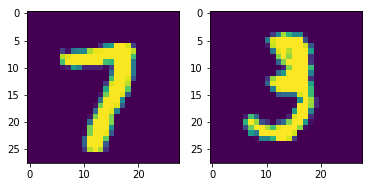

In [8]:
plt.subplot(122)
plt.imshow((X[1]).reshape(28,28))
plt.subplot(121)
plt.imshow((X[-1]).reshape(28,28))#size Xbis=14433

Nous utilisons la fonction LogisticRegression pour apprendre un modèle de classication sur l'intégralité des données (on choisira un cas sans ordonnée à l'origine, i.e., l'option fit_intercept=False).nous utilisons liblinear puisque c'est le 'solver' optimal pour nos données (grande dimension + classification binaire).

In [9]:
#import time
from sklearn.linear_model import LogisticRegression
#t0 = time.time()

In [10]:
clf = LogisticRegression(random_state=0, solver='liblinear' ,fit_intercept=False).fit(X, y)
w=clf.coef_
len(w)

1

Nous créons une fonction qui prédit la classe en fonction en se basant sur le signe de $\langle w, x \rangle$.

In [11]:
def PredictNumber(x):
    "predict class x"
    a=np.dot(w,x)
    if a>0:
        print("le chiffre est 7")
    else:
        print("le chiffre est 3")
    #plt.mshow

In [12]:
PredictNumber(X[1])
PredictNumber(X[-1])

le chiffre est 3
le chiffre est 7


In [13]:
  x=X[-1]
def fig_digit(alpha):
    x_mod=x-alpha*(np.dot(w,x)/np.dot(w,w.T))*w
    plt.subplot(122)
   
    plt.title('image modifié ')
    plt.imshow(np.matrix(x_mod).reshape(28,28))#, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show() 


Création du widget:

In [14]:
from ipywidgets import interact, interactive, IntSlider, Layout
import ipywidgets as widgets
from IPython.display import display

interactive(children=(FloatSlider(value=50.00000000000001, description='alpha', min=0.1), Output()), _dom_clas…

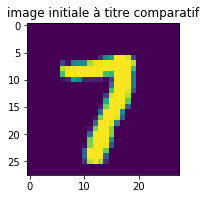

In [15]:
a=interactive(fig_digit,x=(x),w=(w),alpha=(0.1,100,0.1))
display(a)

#pour comparer
plt.subplot(121)
plt.title('image initiale à titre comparatif')
plt.imshow(np.matrix(x).reshape(28,28))#, cmap=plt.cm.gray_r, interpolation='nearest')


In [16]:
from sklearn.decomposition import PCA

acp = PCA(2)
Xacp = acp.fit_transform(X)
print(X.shape)
print(Xacp.shape)


(14434, 784)
(14434, 2)


<Figure size 432x288 with 0 Axes>

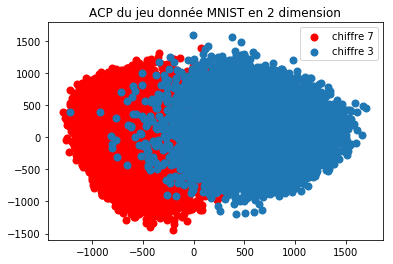

<Figure size 432x288 with 0 Axes>

In [17]:

plt.scatter(Xacp[y==7, 0], Xacp[y==7, 1],
            color='red',lw=2,label='chiffre 7')
plt.scatter(Xacp[y==3, 0], Xacp[y==3, 1],
            lw=2,label='chiffre 3')
plt.title('ACP du jeu donnée MNIST en 2 dimension')
plt.legend(loc='best',shadow=False,scatterpoints=1)
plt.figure()


Film  HTML décrivant le rôle du $\alpha$.

<IPython.core.display.Javascript object>


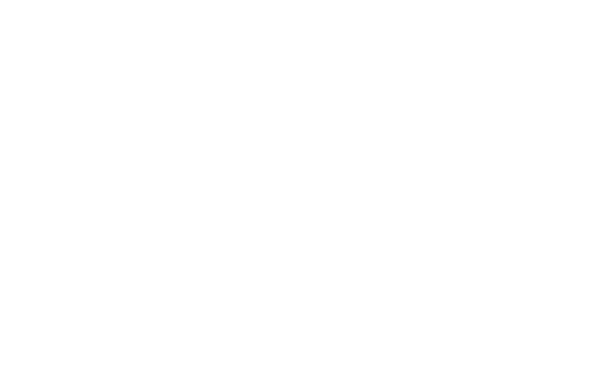

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


IndexError: list index out of range

<IPython.core.display.Javascript object>


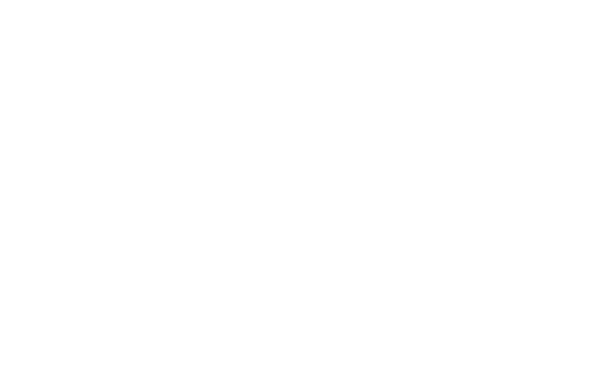

Traceback (most recent call last):
  File "C:\Users\utilisateur\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "C:\Users\utilisateur\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [18]:


from matplotlib import animation
from matplotlib import rc
from IPython.display import HTML

%matplotlib notebook
fig = plt.figure()
ax = plt.axes(xlim=(0,28),ylim=(28,0))
ims = []

for i in range(100):
    im = fig_digit(i)
    ims.append([im])
#X[0],clf.coef_,
#anim = animation.FuncAnimation(fig, ims,frames=200,frames=200, interval=50, blit=True)
anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=50)
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
#anim.to_html5_video()
plt.show()

Décrivons mathématiquement ce que paramétrise le paramètre $\alpha$ dans l'opération : $$x_{\bmod }=x-\alpha \frac{w^{\top} x}{\|w\|^{2}} w \hspace{1cm} (*).$$
L'opération $(*)$ décrit un algorithme de descente de gradient, où le paramètre $\alpha$ joue le rôle du pas d'apprentissage dans l'algorithme, qui permet de moduler la correction ($\alpha$ trop faible, lenteur de convergence ; $\alpha$ trop élevé, oscillation), il paramétrise le taux de changement de l'image, plus $\alpha$ est grand, plus l'image sera modifiée à chaque itération de l'algorithme, chose qu'on peut percevoir dans le widget ou le film que nous avons créé dans les deux questions précédentes.